# 전체 데이터 작업 

In [1]:
pd.options.display.float_format = '{:.5f}'.format

In [2]:
# # 피클 저장하기 

# with open('jeju_all.pickle','wb') as fw:
#     pickle.dump(jeju_all, fw)

In [3]:
import pickle
with open('jeju_all.pickle','rb') as fr:
    jeju_all = pickle.load(fr)

jeju_all

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280080,275532,275532,202008,제주특별자치도,제주시,영세,보습학원,x시,200000,0,1,0,910239.73420,1500965.97360,126.53369851534627,33.49678916515772,126.53369851534627_33.49678916515772,이도이동,교육/육아
280081,275664,275664,202008,제주특별자치도,제주시,영세,학원(회원제형태),x시,220000,0,1,0,910390.62740,1500766.78250,126.535342658025,33.4950054416331,126.535342658025_33.4950054416331,이도이동,교육/육아
280082,278935,278935,202008,제주특별자치도,서귀포시,영세,예체능학원,x시,110000,0,1,0,921003.98200,1476177.84050,126.65174159048293,33.27407883370635,126.65174159048293_33.27407883370635,남원읍,교육/육아
280083,279538,279538,202008,제주특별자치도,서귀포시,영세,기타가구,x시,50000,0,1,0,937500.16740,1486052.75280,126.82818252032293,33.36422597166203,126.82818252032293_33.36422597166203,성산읍,생활/기타


# 1. 어떤 지역에서 재난 지원금이 많이 쓰였는지 
# - 읍면동 그룹 > 재난지원금 금액의 합계 
# - 상위 읍면동 5곳 확인 

In [36]:
jeju_all

# 재난지원금 지역별 총 합계 확인 
jeju_all_dispent = jeju_all.groupby('dong').sum().sort_values('DisSpent', ascending = False)
jeju_all_dispent.reset_index(inplace=True)
jeju_all_dispent['dong'].unique()

array(['노형동', '연동', '이도이동', '일도이동', '서귀동', '애월읍', '일도일동', '도남동', '동홍동',
       '한림읍', '대정읍', '아라일동', '화북일동', '조천읍', '외도일동', '성산읍', '삼도일동', '이도일동',
       '남원읍', '표선면', '삼도이동', '건입동', '도련일동', '중문동', '용담이동', '토평동', '강정동',
       '아라이동', '안덕면', '구좌읍', '용담일동', '오라이동', '상효동', '한경면', '삼양이동', '서호동',
       '서홍동', '오라삼동', '오라일동', '법환동', '화북이동', '봉개동', '도두일동', '색달동', '추자면',
       '이호이동', '하효동', '해안동', '용담삼동', '호근동', '내도동', '오등동', '대포동', '보목동',
       '삼양일동', '영평동', '이호일동', '상예동', '도평동', '도련이동', '신효동', '월평동', '도두이동',
       '외도이동', '하원동', '우도면', '회천동', '도순동', '회수동', '하예동', '삼양삼동', '용강동',
       '영남동'], dtype=object)

In [5]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')
from matplotlib import rc
import seaborn as sns 

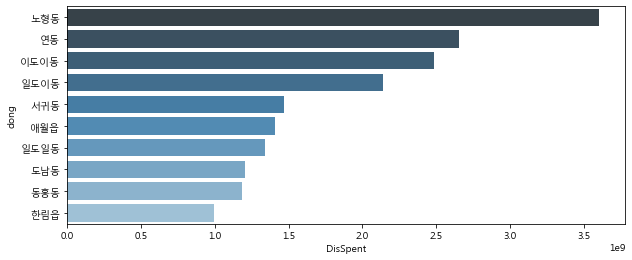

In [69]:
# 상위 10개 지역 barplot 표현 
dispent_bottom = jeju_all_dispent[:10]

plt.figure(figsize=(10,4))
sns.barplot(x='DisSpent', y='dong', data= jeju_all_dispent[:10], palette='Blues_d')

########## 제주 중심지역 위주로 재난지원금이 사용됨 #########

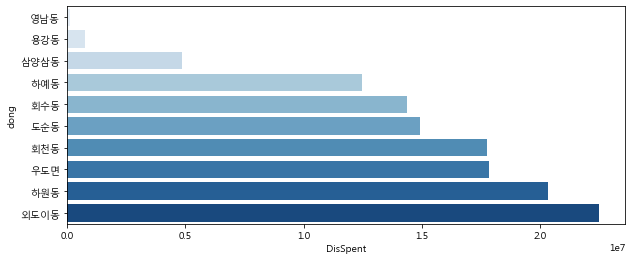

In [70]:
# 하위 지역 10곳 
dispent_bottom = jeju_all_dispent[:62:-1]

plt.figure(figsize=(10,4))
sns.barplot(x='DisSpent', y='dong', data= jeju_all_dispent[:62:-1], palette='Blues')


In [8]:
#folium top10 시각화 
# import folium 
# map = folium.Map(location = [33.38773221915759,126.54124720118492], zoom_start=10)

# for item in dispent_bottom.index


#업체 시각화 

# 어떤 지역에서의 인당 재난지원금 사용 비중이 높았는지 
- 재난 지원금 사용금액은 1인가구일수록 높은 경향 
- 제주도 1인 가구 지역과의 관계
- 경향이 다르다면 지역민은 다른 곳에 가서 소비했을 것임 

In [37]:
ppl = pd.read_csv('./jeju_ppl.csv')
ppl.head()

,dong,ppl
0,한림읍,24747
1,애월읍,37847
2,구좌읍,16118
3,조천읍,25742
4,한경면,9488


In [38]:
# 데이터 합치기 (동별 사용금액 합계, 인구수)

jeju_all_2 = pd.merge(jeju_all_dispent,ppl,on='dong')
jeju_all_2.head()

,dong,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,ppl
0,노형동,13132052420,13132052420,18860741288,60306072018,3600581774,1999363,127628,84503233243.14549,140009302519.20633,56746
1,연동,13086905746,13086905746,19224958431,66132634501,2655454860,1933800,95686,86252129801.84601,142739675795.30222,43756
2,이도이동,11613906917,11613906917,16148803115,42412956256,2485420890,1488964,88475,72782431925.90149,119982610107.20915,50746
3,일도이동,5773201493,5773201493,8072583552,24009935766,2138328922,768619,62619,36399896508.15907,60025218406.66868,33548
4,애월읍,6409590458,6409590458,9663588290,30586306203,1405507481,977019,45583,42829318151.84782,71627459076.61865,37847


In [44]:
jeju_all_2['DisSpent_person'] = jeju_all_2['DisSpent'] / jeju_all_2['ppl']
jeju_all_2.sort_values(by= 'DisSpent_person', ascending = False,inplace = True)
jeju_all_2.head(10)

,dong,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,ppl,DisSpent_person
5,일도일동,2940290222,2940290222,4074470896,13463172598,1337076048,338711,25578,18346340078.98769,30311400293.78540,2719,491752.86797
12,이도일동,3157337145,3157337145,4677056250,10734320739,699832176,346481,23294,21059582850.92886,34777742638.96059,7775,90010.56926
15,삼도이동,2302976133,2302976133,3337349554,17163600191,585625283,449633,19392,15019918844.59014,24824935721.80586,8327,70328.48361
3,일도이동,5773201493,5773201493,8072583552,24009935766,2138328922,768619,62619,36399896508.15907,60025218406.66868,33548,63739.38601
0,노형동,13132052420,13132052420,18860741288,60306072018,3600581774,1999363,127628,84503233243.14549,140009302519.20633,56746,63450.84718
1,연동,13086905746,13086905746,19224958431,66132634501,2655454860,1933800,95686,86252129801.84601,142739675795.30222,43756,60687.78819
25,추자면,343443601,343443601,534509220,866954919,118628570,27367,3488,2352751166.69019,4107925537.78026,1958,60586.60368
16,건입동,1665214940,1665214940,2527909498,9562572534,536581759,288100,16711,11391346769.04460,18809749608.89783,9356,57351.62024
11,삼도일동,2814634547,2814634547,4140123143,9671961045,727364040,342952,27911,18628873048.72687,30773350242.50340,13797,52718.99978
2,이도이동,11613906917,11613906917,16148803115,42412956256,2485420890,1488964,88475,72782431925.90149,119982610107.20915,50746,48977.67095


In [ ]:
# 지역별 재난 지원금 top 사용 업종 
# 지역별 재난 지원금 비중 top 사용 업종 

In [58]:
jeju_all['dis/tot'] = round(jeju_all['DisSpent'] / jeju_all['TotalSpent'],1)
jeju_all['count'] = 1 
jeju_all.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,...,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category,dis/tot,count
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,...,2,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,0.20000,1
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,...,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,0.00000,1
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,...,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,0.00000,1
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,...,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,외식/주점,0.00000,1
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,...,0,877005.98340,1479766.07300,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면,의료,0.00000,1


In [63]:
# # 조천읍 

# cond1 = jeju_all['SIGUNGU'] == '제주시'
# cond2 = jeju_all['dong'].str.contains('조천읍')
# df_reg_jce = jeju_all[cond1&cond2]

# df_reg_jce_ty = df_reg_jce.groupby(['Type']).sum().sort_values('dis/tot', ascending=False)
# df_reg_jce_ty = df_reg_jce_ty.reset_index()
# df_reg_jce_ty.head()

# plt.figure(figsize=(18,3))
# sns.barplot(x= 'Type',y='dis/tot', data= df_reg_jce_ty[:10])

In [64]:
# # 제주시 

# cond1 = jeju_all['SIGUNGU'] == '제주시'
# cond2 = jeju_all['dong'].str.contains('동')
# df_reg_jejusi = jeju_all[cond1&cond2]

# df_reg_jejusi_ty = df_reg_jejusi.groupby(['Type']).sum().sort_values('dis/tot', ascending=False)
# df_reg_jejusi_ty = df_reg_jejusi_ty.reset_index()
# df_reg_jejusi_ty.head()

# plt.figure(figsize=(18,3))
# sns.barplot(x= 'Type',y='dis/tot', data= df_reg_jejusi_ty[:10])

In [65]:
# # 구좌읍

# cond1 = jeju_all['SIGUNGU'] == '제주시'
# cond2 = jeju_all['dong'].str.contains('구좌읍')
# df_reg_gj = jeju_all[cond1&cond2]

# df_reg_gj_ty = df_reg_gj.groupby(['Type']).sum().sort_values('dis/tot', ascending=False)
# df_reg_gj_ty = df_reg_gj_ty.reset_index()
# df_reg_gj_ty.head()

# plt.figure(figsize=(18,3))
# sns.barplot(x= 'Type',y='dis/tot', data= df_reg_gj_ty[:10])

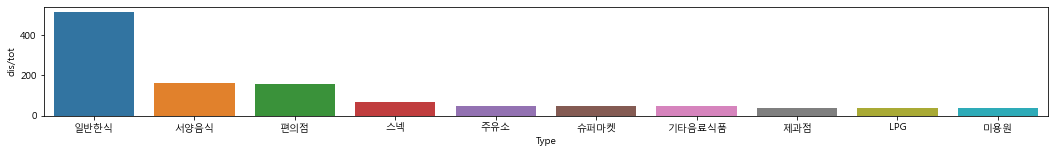

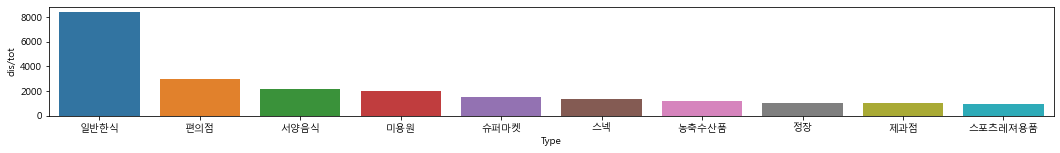

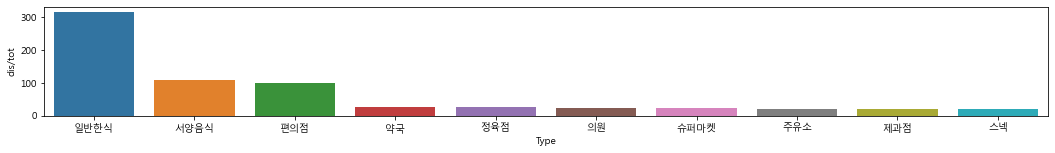

In [86]:
plt.figure(figsize=(18,2)) 
sns.barplot(x= 'Type',y='dis/tot', data= df_reg_jce_ty[:10])

# plt.figure(figsize=(18,2)) #하위 
# sns.barplot(x= 'Type',y='dis/tot', data= df_reg_jce_ty[85:93])

plt.figure(figsize=(18,2))
sns.barplot(x= 'Type',y='dis/tot', data= df_reg_jejusi_ty[:10])

plt.figure(figsize=(18,2))
sns.barplot(x= 'Type',y='dis/tot', data= df_reg_gj_ty[:10])
#조천읍/제주시/구좌읍

In [ ]:
# 어떤 업종에서 재난 지원금 총사용량이 높은지
# 어떤 업종에서 재난 지원금이 사용 비중이 높은지 
# 어떤 업종에서 재난 지원금 사용 비중이 낮은지 

In [ ]:
# 업종 규모별 재난지원금 포함 비율 
